In [1]:
# imports
import os
import sys
import time
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

from tf_cnnvis import *

np.random.seed(10)

%load_ext autoreload
%autoreload 2

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# helper method to define model
def deepnn(x):
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    x_image = tf.image.resize_image_with_crop_or_pad(x_image, target_height=32, target_width=32)

    W_conv1 = weight_variable([5, 5, 1, 6])
    b_conv1 = bias_variable([6])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

    h_pool1 = max_pool_2x2(h_conv1)

    W_conv2 = weight_variable([5, 5, 6, 16])
    b_conv2 = bias_variable([16])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

    h_pool2 = max_pool_2x2(h_conv2)

    W_fc1 = weight_variable([8*8*16, 120])
    b_fc1 = bias_variable([120])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*16])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#     keep_prob = tf.placeholder(tf.float32)
#     h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    W_fc2 = weight_variable([120, 10])
    b_fc2 = bias_variable([10])

    y_conv = tf.nn.relu(tf.matmul(h_fc1, W_fc2) + b_fc2)
    return x_image, y_conv, h_conv1, h_pool1, h_conv2, h_pool2, h_fc1


def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [3]:
#load graph and data and run training

tf.reset_default_graph()

# reading data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# defining TF model
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])
x_image, y_conv, h_conv1, h_pool1, h_conv2, h_pool2, h_fc1 = deepnn(x)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_conv, labels = y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# trainning CNN
sess= tf.Session()

# sess.run(tf.global_variables_initializer())
# with sess.as_default():
#     for i in range(10000):
#         batch = mnist.train.next_batch(50)
#         if i%10 == 0:
#             train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
#             print("step %d, training accuracy %g"%(i, train_accuracy))
#         train_step.run(feed_dict={x: batch[0], y_: batch[1]})
        
#     x_feed = mnist.test.images.reshape(-1, 784)[:100]
#     y_feed = mnist.test.labels.reshape(-1, 10)[:100]
#     print("test accuracy %g"%accuracy.eval(feed_dict={x: x_feed, y_: y_feed, 
#                                                       }))

#     test_x = mnist.test.images.reshape(-1, 784)[0]
#     test_y = mnist.test.images.reshape(-1, 10)[0]
#     feed_dict = {x: test_x, y:test_y}

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [4]:
saver = tf.train.Saver()

saver.restore(sess, './model/model_chkpoint')


# deconv visualization
test_x = mnist.test.images.reshape(-1, 784)[0:1]
test_y = mnist.test.labels.reshape(-1, 10)[0:1]

feed_dict = {x: test_x, y_:test_y}

# layers = ["r", "p", "c"]
# total_time = 0

# start = time.time()
#     # api call
# is_success = deconv_visualization(sess_graph_path = sess, value_feed_dict = feed_dict, 
#                                   input_tensor=x_image, layers=layers, 
#                                   path_logdir=os.path.join("Log","MNISTExample"), 
#                                   path_outdir=os.path.join("Output","MNISTExample"))
# start = time.time() - start
# print("Total Time = %f" % (start))

INFO:tensorflow:Restoring parameters from ./model/model_chkpoint


In [10]:
# start = time.time()
#     # api call
# is_success = activation_visualization(sess_graph_path = sess, value_feed_dict = feed_dict, 
#                                   input_tensor=x_image, layers=layers, 
#                                   path_logdir=os.path.join("Log","MNISTExample"), 
#                                   path_outdir=os.path.join("Output","MNISTExample"))
# start = time.time() - start
# print("Total Time = %f" % (start))

INFO:tensorflow:Restoring parameters from model/tmp-model
Reconstruction Completed for Relu layer. Time taken = 0.673796 s
Reconstruction Completed for Relu_1 layer. Time taken = 0.049525 s
Reconstruction Completed for Relu_2 layer. Time taken = 0.081727 s
Reconstruction Completed for Relu_3 layer. Time taken = 0.036901 s
Reconstruction Completed for MaxPool layer. Time taken = 0.028609 s
Reconstruction Completed for MaxPool_1 layer. Time taken = 0.042631 s
Reconstruction Completed for Conv2D layer. Time taken = 0.047269 s
Reconstruction Completed for Conv2D_1 layer. Time taken = 0.032229 s
Total Time = 4.159668


In [5]:
import matplotlib.pyplot as plt

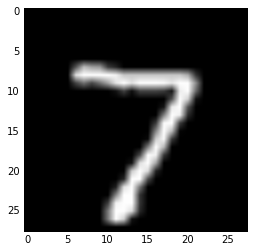

In [6]:
plt.imshow(test_x.reshape(28, 28), cmap='gray')

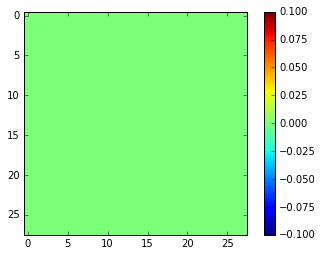

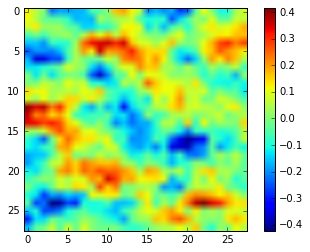

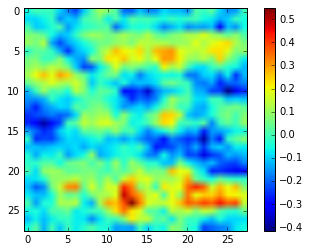

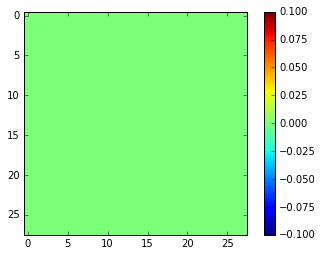

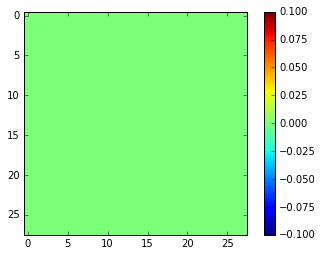

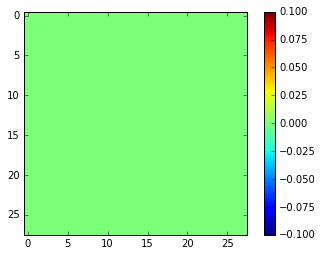

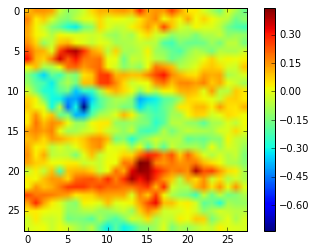

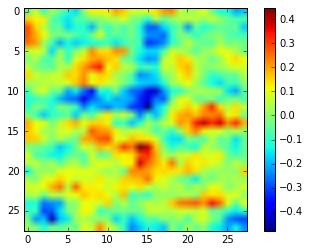

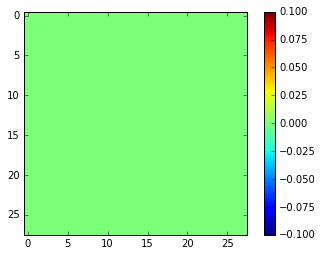

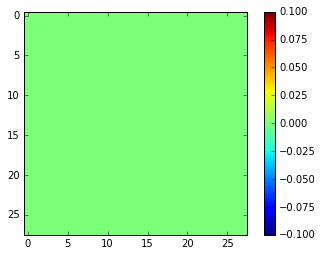

In [141]:
# y_res = sess.run(h_conv1, {x:test_x.reshape(-1, 784)})

for i in range(10):
    deriv = tf.gradients(h_fc1[0][i], x)
    # y_res[0][1

    dydx = sess.run(deriv, {x:test_x.reshape(-1, 784)})

    dydx = np.array(dydx)

    fig, ax = plt.subplots()

    im = ax.imshow(dydx.reshape((28, 28)), cmap='jet')

    fig.colorbar(im, ax=ax)

    plt.savefig('./Output/LeNet/Output_Layer/filter_{}.jpg'.format(i))

In [59]:
def deconvolution_here(graph, sess, op_tensor, X, feed_dict):
    out = []
    with graph.as_default() as g:
        # get shape of tensor
        tensor_shape = op_tensor.get_shape().as_list()

        with sess.as_default() as sess:
            # creating placeholders to pass featuremaps and
            # creating gradient ops
            featuremap = [tf.placeholder(tf.int32) for i in range(config["N"])]
            reconstruct = [tf.gradients(tf.transpose(tf.transpose(op_tensor)[featuremap[i]]), X)[0] for i in range(config["N"])]

            # Execute the gradient operations in batches of 'n'
            for i in range(0, tensor_shape[-1], config["N"]):
                c = 0
                for j in range(config["N"]):
                    if (i + j) < tensor_shape[-1]:
                        feed_dict[featuremap[j]] = i + j
                        c += 1
                if c > 0:
                    out.extend(sess.run(reconstruct[:c], feed_dict = feed_dict))
    return out

In [61]:
feed_dict = {x: test_x, y_:test_y}

In [62]:
output = deconvolution_here(sess.graph, sess, y_conv, test_x, feed_dict)

TypeError: Fetch argument None has invalid type <type 'NoneType'>